   **Result**
- Best Models : Neural Netowrk MLP Classifier and BaggingClassifier Naive with 0.82577 accuracy for test data.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Data Loading**

In [16]:
data =  pd.read_csv(r"E:\Semester Two UTD\Applied machine Learning\Project2\mis6341-project2\train.csv")
test= pd.read_csv(r"E:\Semester Two UTD\Applied machine Learning\Project2\mis6341-project2\test.csv")

In [17]:
pd.set_option('display.max_columns', 999)
data.head()

Id        V1        V2        V3        V4        V5        V6  \
0  138662 -0.711273  1.272483  1.681631  0.039897 -0.312381 -1.161083   
1  235999  1.990679 -0.128465 -1.700556  0.529839  0.136889 -1.404270   
2  245376  1.812653 -0.476162 -0.338988  1.386750 -0.745965 -0.449870   
3  202483 -1.014219  0.522775 -0.337978 -1.957797  3.578395  3.266965   
4    9710 -0.967270 -0.053815  2.273463 -0.894434  0.728924  0.153524   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.853875 -0.173979 -0.438558 -0.053805  0.321036  0.814690  1.226450   
1  0.593353 -0.456700  0.648260 -0.071353 -0.982339  0.229658 -0.592959   
2 -0.492226  0.029904  1.129394  0.227346 -1.197477 -0.555129 -1.369130   
3  0.602857  0.644645 -0.305879 -0.417906  0.010333 -0.299630 -0.379164   
4 -0.038330  0.165252  1.172526 -0.879114  2.505831 -2.249565  0.791677   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.152389  0.687480 -0.030825 -0.284477 -0.696867 -0.227419  0.298008   
1  0.574159 -0.263545 -0.780886 -0.066039 -0.575168  0.227544 -0.205092   
2  0.320282  1.002745  0.501765 -0.670053  0.478236 -0.820942 -0.202894   
3  0.329193  0.957904 -0.417285 -0.705683 -0.063235 -0.381035  0.136061   
4  1.546279 -0.133370  0.184501  0.307080 -0.081722 -1.359941  0.007512   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.208181 -0.414631  0.057957  0.930321 -0.165598  0.038799  0.384295   
1  0.018179  0.179084 -0.004248  0.039531  0.333765 -0.225201 -0.047285   
2  0.252668  0.655719  0.090057 -0.136884 -0.172452 -0.556921  0.036490   
3  0.147742  0.590740 -0.680551  0.745346  1.119496  0.013520  0.004530   
4  0.106692  0.514430 -0.081546 -0.305042 -0.354883  0.896254 -0.182293   

        V28    V29  Target  
0  0.192762  21.87       0  
1 -0.059682  49.99       0  
2 -0.021575  79.00       0  
3 -0.132643   6.00       0  
4 -0.142810  15.95       0

In [4]:
test.head()

Id        V1        V2        V3        V4        V5        V6  \
0   83172 -2.033519 -1.079309  1.972553 -1.377534 -0.773444  0.702919   
1  140094  1.125524  0.189854  1.508660  2.719937 -0.882342  0.128390   
2  116283 -0.578027  1.109673  1.231751  0.725871  0.139675 -0.030415   
3  222830  1.914017  0.588986 -1.481645  3.515009  1.271977  0.502868   
4   60185  1.267642  0.725939 -0.091806  2.370915  0.420349 -0.570252   

         V7        V8        V9       V10       V11       V12       V13  \
0 -0.870868  1.082417 -0.789931 -0.423770  0.896552  0.209885 -0.620576   
1 -0.622651  0.219444  0.255370  0.521745 -1.117557 -0.342582 -0.918035   
2  0.770472  0.072078 -0.793572  0.184147  1.645460  0.845934  0.142001   
3  0.536994 -0.055564 -1.452582  1.608266 -0.017385  0.516420  0.316831   
4  0.534720 -0.235391 -0.977075  0.747207 -1.026836 -0.436811 -0.236790   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.361854 -1.384877  0.660577  0.991411 -1.690717 -0.090685  0.536853   
1 -0.224183 -0.198108  0.665628 -0.360430 -0.083164 -0.835712 -0.225172   
2  0.458493  0.542704 -0.498539 -0.115382  0.045651  0.253390  0.097561   
3  0.466473 -2.042896  0.670720 -0.999955 -0.150430 -0.785459 -0.179258   
4  0.546444  0.273142  0.487058 -0.641307 -0.304589 -0.696897 -0.172138   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.300559  0.409305  0.119931 -0.295053  0.331692 -0.277494  0.184017   
1 -0.097584 -0.172683  0.057556  0.360859  0.265443 -0.040417  0.036686   
2  0.214610  0.773072 -0.110802  0.248029 -0.326140 -0.330373  0.321788   
3  0.010252  0.020996  0.026001  0.186830  0.288364 -0.004518 -0.073108   
4 -0.052174 -0.176550 -0.161225 -0.123870  0.787280  0.100856 -0.041856   

        V28     V29  
0 -0.076897  141.01  
1  0.033685    0.00  
2  0.198050   43.25  
3 -0.063333   30.67  
4  0.004038    1.21

In [5]:
data.shape

(24846, 31)

In [6]:
test.shape

(24846, 30)

In [7]:
data.describe()

Id            V1            V2            V3            V4  \
count   24846.000000  22459.000000  24846.000000  24846.000000  24846.000000   
mean   141868.788095     -0.042032      0.019074     -0.055260      0.029289   
std     82016.035976      2.061469      1.722647      1.730072      1.482053   
min        32.000000    -37.054295    -39.818310    -48.325589     -5.231828   
25%     70705.000000     -0.941997     -0.611444     -0.918977     -0.853705   
50%    141887.000000      0.002750      0.068992      0.163070     -0.006193   
75%    212513.500000      1.309469      0.825253      1.016704      0.759149   
max    284781.000000      2.418267     19.167239      3.862590     15.304184   

                 V5            V6            V7            V8            V9  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean      -0.031085     -0.008175     -0.026007      0.014152     -0.017939   
std        1.616062      1.413044      1.620777      1.236557      1.140772   
min     -113.743307    -19.996349    -37.060311    -39.688571    -11.126624   
25%       -0.705745     -0.778707     -0.565469     -0.207270     -0.659425   
50%       -0.070299     -0.279575      0.032157      0.026507     -0.056063   
75%        0.598372      0.402585      0.569205      0.335042      0.586035   
max       28.762671     73.301626    120.589494     19.587773      8.918202   

                V10           V11           V12           V13           V14  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean      -0.035149      0.024294     -0.049479      0.001362     -0.054444   
std        1.279021      1.099884      1.216934      0.992960      1.204090   
min      -23.228255     -4.568390    -18.683715     -3.844974    -19.214325   
25%       -0.543054     -0.765464     -0.423463     -0.646768     -0.434402   
50%       -0.094353     -0.041019      0.137088     -0.005918      0.051674   
75%        0.454624      0.749140      0.621207      0.664828      0.485664   
max       15.331742     12.018913      4.242791      7.126883      7.439566   

                V15           V16           V17           V18           V19  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean       0.002910     -0.042306     -0.056821     -0.014644      0.002778   
std        0.917929      1.009002      1.184588      0.891371      0.825121   
min       -4.498945    -14.129855    -25.162799     -9.287832     -4.395283   
25%       -0.579738     -0.487703     -0.491669     -0.505933     -0.458749   
50%        0.053821      0.047246     -0.077799     -0.007094      0.003545   
75%        0.654127      0.510476      0.390588      0.497511      0.456741   
max        8.877742     17.315112      7.733456      4.093440      5.501747   

                V20           V21           V22           V23           V24  \
count  22317.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean       0.003860      0.004708      0.006116     -0.004320     -0.005632   
std        0.832891      0.753043      0.728869      0.622440      0.602507   
min      -54.497720    -21.620120     -8.887017    -23.222016     -2.759942   
25%       -0.212758     -0.225318     -0.528751     -0.163086     -0.363609   
50%       -0.060477     -0.026834      0.016988     -0.011396      0.036837   
75%        0.137391      0.192690      0.533115      0.147343      0.433292   
max       17.819507     27.202839      8.272233     17.606637      4.584549   

                V25           V26           V27           V28           V29  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean       0.003193      0.001730      0.003160     -0.000100     91.698618   
std        0.518214      0.483415      0.455299      0.314326    310.349300   
min       -4.930750     -1.658162     -7.976100    -15.430084      0.000000   
25%       -0.310198     -0.325839     -0.069698     -0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

All variables are either of type numeric or float

In [18]:
# Looking for NaN
display(data.isnull().any())

Id        False
V1         True
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20        True
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
V29       False
Target    False
dtype: bool

In [19]:
null_col = []
for col in data.columns:
    null_count = sum((data[col].isnull()))
    if null_count > 0:
        print(col,":",null_count)
        null_col.append(col)

V1 : 2387
V20 : 2529


**Variable V1 and V20 have 2387,2529 null values respectively.**

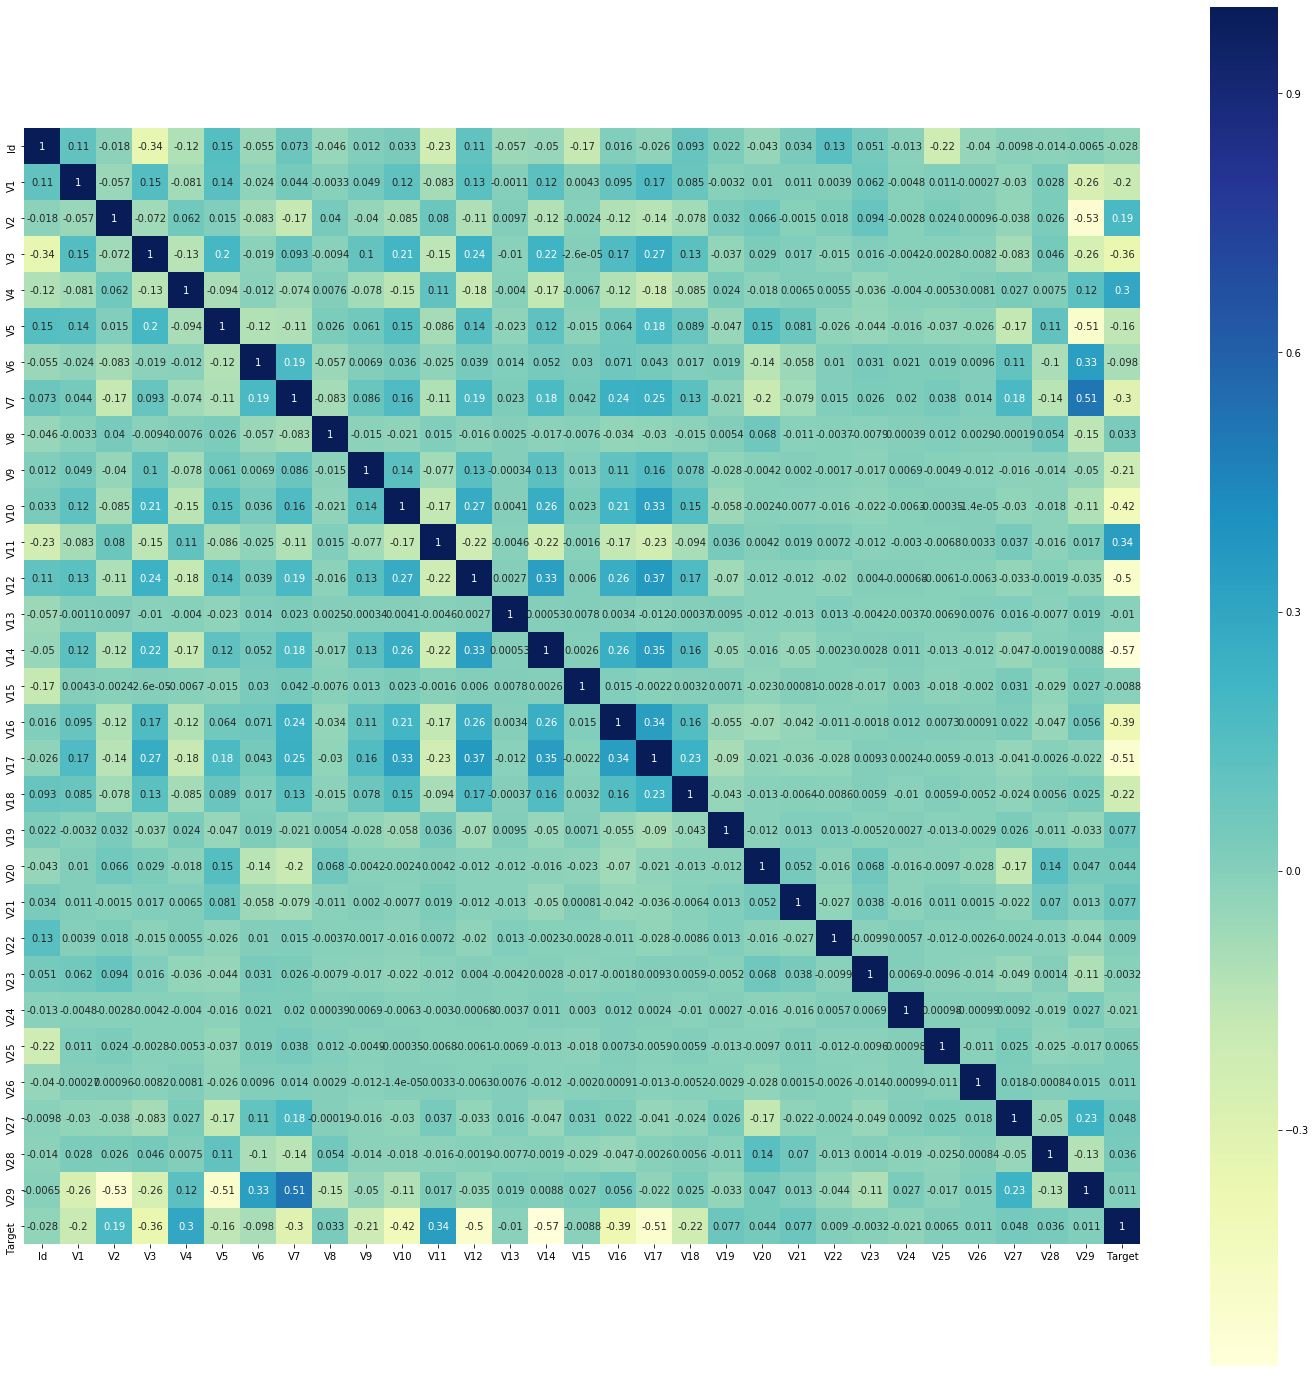

In [13]:
import seaborn as sns
f, ax = plt.subplots(figsize=(25, 25))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True,square=True, ax=ax,cmap="YlGnBu")

**Observation:**
**Variables V7 and V29 have maximum correlation of 0.51**
**V4 and V11 have maximum correlation with the target variable**

In [14]:
data1 = data.drop('Target',axis=1)

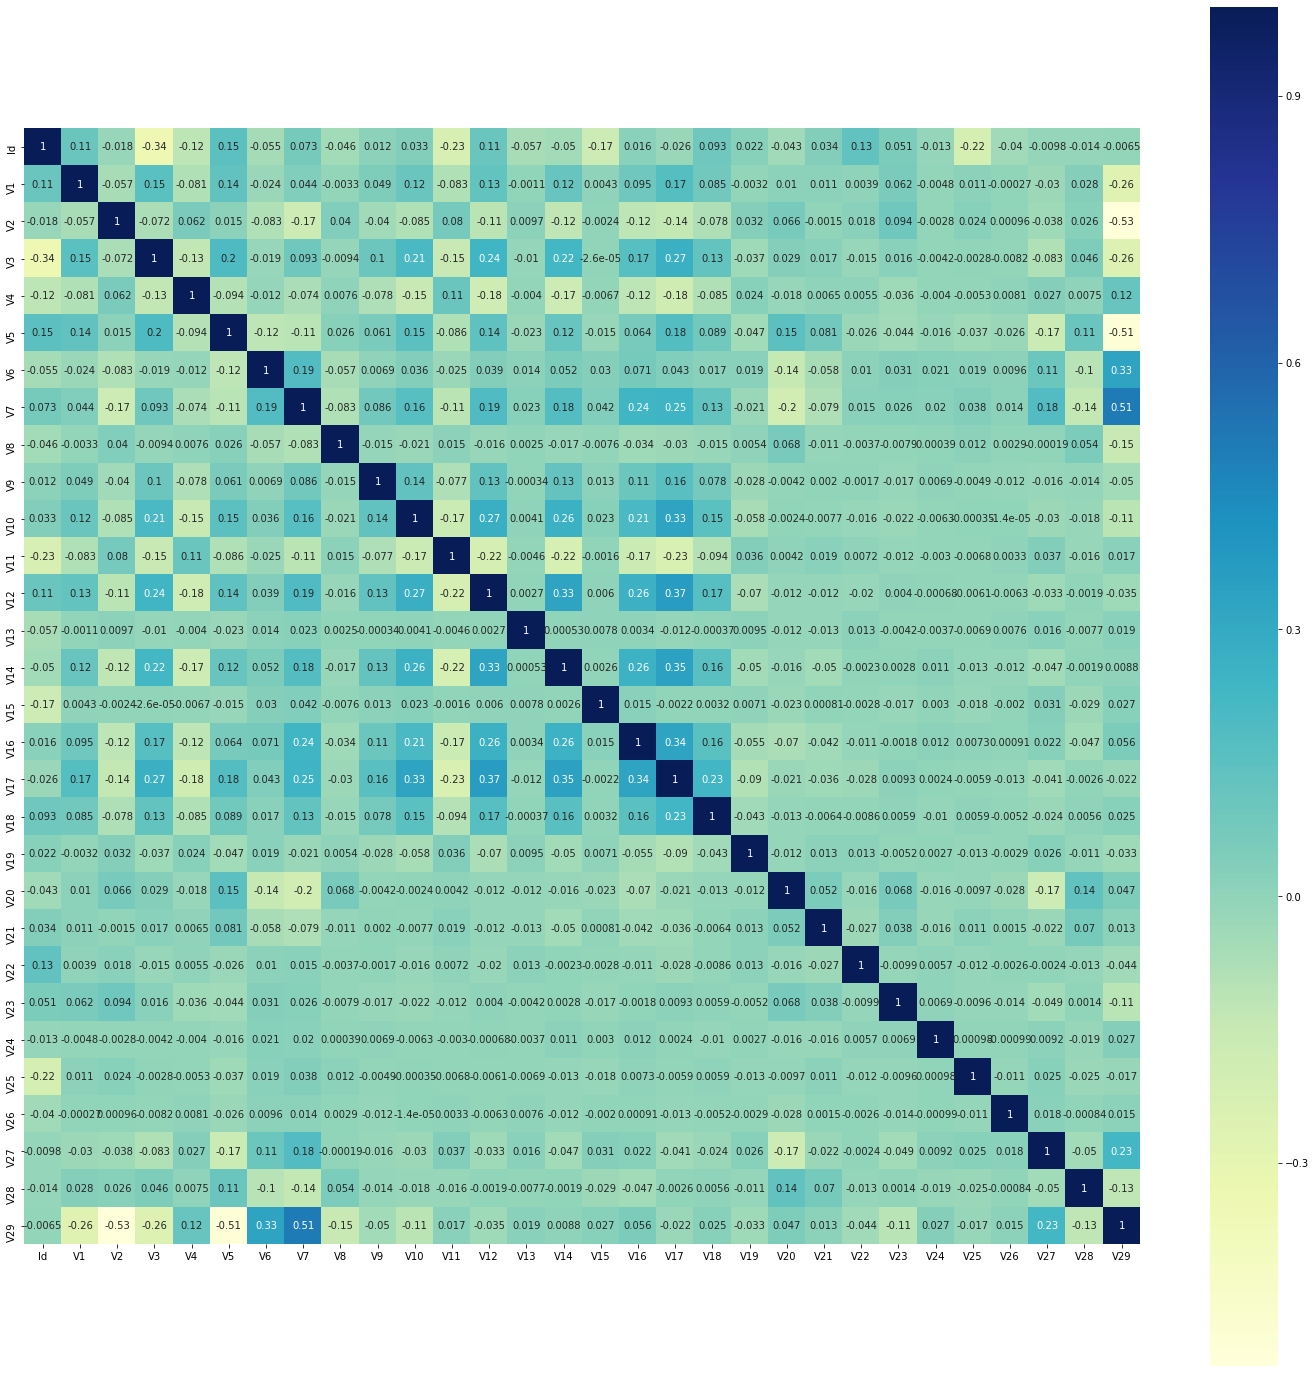

In [15]:
import seaborn as sns
f, ax = plt.subplots(figsize=(25, 25))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True,square=True, ax=ax,cmap="YlGnBu")

In [11]:
# missing values
data.isnull().mean()

Id        0.000000
V1        0.096072
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.101787
V21       0.000000
V22       0.000000
V23       0.000000
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
V29       0.000000
Target    0.000000
dtype: float64

**Target Variable Distribution in Train Data**

In [17]:
import plotly.offline as py
import plotly.graph_objs as go
data1 = [go.Bar(
            x=data["Target"].value_counts().index.values,
            y= data["Target"].value_counts().values
    )]

py.iplot(data1, filename='basic-bar')

As we can see data is highly imbalanced in the train file.This can lead to overfitting, as prediction of algorithms will be biased towards the zero class. 244-1's and 24602-Zeroes.

**X train and Y train - dropping target variable and Id**

In [20]:
X_train = data.drop(['Target','Id'], axis=1)
y_train = data['Target']

X_train.shape, y_train.shape

((24846, 29), (24846,))

In [21]:
X_test=test.drop(['Id'], axis=1)
X_test.shape

(24846, 29)

 **import relevant modules for feature engineering**

In [22]:
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine import discretisers as dsc
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [23]:
Binary_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['V1','V20'])),
    # categorical encoding 
     #('rare_label_enc', ce.RareLabelCategoricalEncoder(
         #tol=0.01,n_categories=6, variables=categorical)),
    #('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    
        # discretisation and encoding
   ('treeDisc',  DecisionTreeDiscretiser(cv=8, scoring='neg_mean_squared_error',
                                  regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6,7,8,9,10]})),
    ('scale',RobustScaler())
     
])

In [24]:
Binary_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['V1', 'V20'])),
                ('treeDisc',
                 DecisionTreeDiscretiser(cv=8,
                                         param_grid={'max_depth': [1, 2, 3, 4,
                                                                   5, 6, 7, 8,
                                                                   9, 10]},
                                         random_state=None, regression=True,
                                         scoring='neg_mean_squared_error',
                                         variables=['V1', 'V2', 'V3', 'V4',
                                                    'V5', 'V6', 'V7', 'V8',
                                                    'V9', 'V10', 'V11', 'V12',
                                                    'V13', 'V14', 'V15', 'V16',
                                                  

**Apply Transformations**

In [25]:
X_train=Binary_preprocess.transform(X_train)
X_test=Binary_preprocess.transform(X_test)

**Basic Algortihm - Naive Algorithm **

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [27]:
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Train Performance: ", model_dummy.score(X_train,y_train))

Mean Cross-validation scores: 0.49975271543582567

Naive Algorithm Train Performance:  0.9816469451823231


**Logistic Regression**

In [28]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV


ftwo_scorer = make_scorer(fbeta_score, beta=2)

#define a list of parameters
log = LogisticRegression()
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'max_iter':[1800]}

grid_log = GridSearchCV(log, param_log, cv=5, scoring=ftwo_scorer)
grid_log.fit(X_train, y_train)

#clf = LogisticRegression().fit(X_train, y_train)
#cv_scores = cross_val_score(clf, X_train, y_train,scoring='ftwo_scorer')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(grid_log.best_score_))
print()

# Print Co-efficients
#print("Logistic.coef_:", grid_log.coef_)
#print("Logistic.intercept_:", grid_log.intercept_)

#find best parameters
print('Logistic parameters: ', grid_log.best_params_)

# Check test data set performance

print("Logistic Train Performance: ", grid_log.score(X_train,y_train))
#print("Logistic Test Performance: ", clf.score(X_test,y_test))



Mean Cross-validation scores: 0.8059074506657993

Logistic parameters:  {'C': 100, 'max_iter': 1800}
Logistic Train Performance:  0.8128704487722269


**KNN**

In [44]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer


ftwo_scorer = make_scorer(fbeta_score, beta=2)
knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            #'algorithm':['auto'], 'leaf_size':[30], 'metric':['minkowski'],
  #'n_jobs':[1], 'p':[2],
 #'weights':['uniform'],
            }

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, scoring=ftwo_scorer)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check train data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))

# Check test data set performance
#print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

test_data_labels = grid_knn.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_baseknn1.csv', index =False)  
print("Done :D")



Best Mean Cross-validation score: 0.74

KNN parameters:  {'n_neighbors': 1}
KNN Train Performance:  0.9308072487644152
Done :D


**Decision Tree**

In [45]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, make_scorer


ftwo_scorer = make_scorer(fbeta_score, beta=2)
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,50),
              'criterion': ["gini","entropy"],
              'splitter':["best","random"],
              'max_features' :["auto", "sqrt", "log2"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring=ftwo_scorer)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
#print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'splitter': 'best'}
Decision Tree Train Performance:  0.9026028547439127


**Random Forest**

In [49]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
from sklearn.metrics import fbeta_score, make_scorer

rfc_param = { 
    'n_estimators': [1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [25,30],
    'criterion' :['gini', 'entropy']
}
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring=ftwo_scorer)
grid_rf.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
#rint(f'Test score is {grid_rf.score(X_test,y_test)}')



Best Mean Cross Validation Score is 0.861971129100669
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'n_estimators': 1200}
Train score is 0.9265442404006677


In [87]:
test_data_labels = grid_rf.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id,'Target': test_data_labels}).to_csv('solution_baseRF77.csv', index =False)  
print("Done :D")

Done :D


**gradient boost**

In [62]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, make_scorer

gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4,5,6,7,8,9,10],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
                 'loss' :['exponential']
             }

ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid_gd = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
grid_gd.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_gd.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_gd.best_params_}')
print(f'Train score is {grid_gd.score(X_train,y_train)}')
#print(f'Test score is {grid_gd.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8363315356959425
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 10, 'n_estimators': 100}
Train score is 0.923141186299081


**Extra Trees**

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import fbeta_score, make_scorer


ftwo_scorer = make_scorer(fbeta_score, beta=2)
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,9,10,15,20],
    'criterion' :['gini', 'entropy'],
    'oob_score' : ['True'],
    'bootstrap': ['True']
}
grid_et = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_et.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_et.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_et.best_params_}')
print(f'Train score is {grid_et.score(X_train,y_train)}')
#print(f'Test score is {grid_et.score(X_test,y_test)}')

test_data_labels = grid_et.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_baseET.csv', index =False)  
print("Done :D")

Best Mean Cross Validation Score is 0.8612265274625454
Best Mean Cross Validation Score is {'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 250, 'oob_score': 'True'}
Train score is 0.9128978224455612


**XGboost**

In [ ]:
#xgboost
from  xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
            'max_depth' : [7,8,9,10],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
grid_xgb = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_xgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_xgb.best_score_}')
print(f'Best Parameters are {grid_xgb.best_params_}')
print(f'Train score is {grid_xgb.score(X_train,y_train)}')
#print(f'Test score is {grid_xgb.score(X_test,y_test)}')


#test_data_labels = grid_xgb.predict(X_test)

# Create predictions to be submitted!
#pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_baseXGB.csv', index =False)  
#print("Done :D")

**Light GBM**

In [75]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [121]:
import lightgbm as lgb
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

lgb = lgb.LGBMClassifier(random_state=42)
lgb_param = {
    'n_estimators': [700],
    #'colsample_bytree': [0.7,0.8,0.9,1.0],
    'max_depth': [-1,2],
    'num_leaves': [491],
    #'reg_alpha': [1.1,1.2,1.3],
    #'reg_lambda': [1.1,1.2,1.3],
    #'min_split_gain': [0.3],
    #'subsample': [1.0],
    #'subsample_freq': [20,25],
    'objective':['binary'],
    #'n_jobs':[4],
    #'is_unbalance':['True'], 
    #'num_threads':[8], 
    #'two_round':['True'],
    #'bagging_fraction':[0.9],
    #'bagging_freq':[1],
    'boosting_type':['gbdt'],
    #'feature_fraction':[0.9],
    'learning_rate':np.logspace(-3,0,10),
    #'min_child_samples':[10],
    #'min_child_weight':[5],
    #'min_data_in_leaf':[20],
     #'num_leaves':[21],
    #'num_leaves': [491],
          #'min_child_weight': [0.03454472573214212],
          #'feature_fraction': [0.3797454081646243],
          #'bagging_fraction': [0.4181193142567742],
          #'min_data_in_leaf': [106],
          #'objective': ['binary'],
          #'max_depth': [-1],
          #'learning_rate':[0.006883242363721497],
         # "boosting_type": ["gbdt"],
          #"bagging_seed": [11],
        
          #"verbosity":[-1],
          #'reg_alpha': [0.3899927210061127],
          #'reg_lambda': [0.6485237330340494],
          #'random_state': [42],

}



grid_lgb = GridSearchCV(lgb, lgb_param,cv=5, return_train_score=True,scoring = ftwo_scorer,verbose=1)
grid_lgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_lgb.best_score_}')
print(f'Best parameters are {grid_lgb.best_params_}')
print(f'Train score is {grid_lgb.score(X_train,y_train)}')
#print(f'Test score is {grid_xgb.score(X_test,y_test)}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.6min finished


Best Mean Cross Validation Score is 0.8540173308702622
Best parameters are {'boosting_type': 'gbdt', 'learning_rate': 0.046415888336127774, 'max_depth': -1, 'n_estimators': 700, 'num_leaves': 491, 'objective': 'binary'}
Train score is 0.9265442404006677


In [122]:
test_data_labels = grid_lgb.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basefinal6.csv', index =False)  
print("Done :D")

Done :D


In [86]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


**CatBoost**

In [117]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

cat = CatBoostClassifier(random_state=42)

cat_param = { 'iterations':[60],
              'depth':[16],
             'learning_rate':[1],
            'loss_function':['Logloss'],
             'verbose':[True],
            'l2_leaf_reg':[100],
          'border_count':[200],
          'thread_count':[4]
}

grid_cat = GridSearchCV(cat, cat_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_cat.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_cat.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_cat.best_params_}')
print(f'Train score is {grid_cat.score(X_train,y_train)}')
#print(f'Test score is {grid_xgb.score(X_test,y_test)}')

0:	learn: 0.0185565	total: 95.5ms	remaining: 5.63s
1:	learn: 0.0148086	total: 111ms	remaining: 3.23s
2:	learn: 0.0142750	total: 130ms	remaining: 2.46s
3:	learn: 0.0133383	total: 507ms	remaining: 7.09s
4:	learn: 0.0131812	total: 1.37s	remaining: 15.1s
5:	learn: 0.0130186	total: 1.72s	remaining: 15.5s
6:	learn: 0.0128798	total: 6.13s	remaining: 46.4s
7:	learn: 0.0127727	total: 6.19s	remaining: 40.2s
8:	learn: 0.0126476	total: 6.53s	remaining: 37s
9:	learn: 0.0125781	total: 10.7s	remaining: 53.7s
10:	learn: 0.0124885	total: 11.1s	remaining: 49.3s
11:	learn: 0.0123764	total: 15.4s	remaining: 1m 1s
12:	learn: 0.0122789	total: 19.8s	remaining: 1m 11s
13:	learn: 0.0121810	total: 23.9s	remaining: 1m 18s
14:	learn: 0.0120973	total: 28s	remaining: 1m 23s
15:	learn: 0.0120135	total: 32s	remaining: 1m 28s
16:	learn: 0.0119499	total: 36.1s	remaining: 1m 31s
17:	learn: 0.0118897	total: 40.2s	remaining: 1m 33s
18:	learn: 0.0118193	total: 44.3s	remaining: 1m 35s
19:	learn: 0.0117536	total: 48.4s	remai

40:	learn: 0.0100171	total: 2m 2s	remaining: 59.5s
41:	learn: 0.0098510	total: 2m 6s	remaining: 56.9s
42:	learn: 0.0098225	total: 2m 10s	remaining: 54.1s
43:	learn: 0.0096630	total: 2m 14s	remaining: 51.4s
44:	learn: 0.0096151	total: 2m 18s	remaining: 48.5s
45:	learn: 0.0094768	total: 2m 23s	remaining: 45.6s
46:	learn: 0.0094362	total: 2m 27s	remaining: 42.7s
47:	learn: 0.0093032	total: 2m 32s	remaining: 39.9s
48:	learn: 0.0092662	total: 2m 37s	remaining: 36.8s
49:	learn: 0.0091379	total: 2m 41s	remaining: 33.7s
50:	learn: 0.0089953	total: 2m 46s	remaining: 30.6s
51:	learn: 0.0089508	total: 2m 52s	remaining: 27.5s
52:	learn: 0.0089187	total: 2m 56s	remaining: 24.2s
53:	learn: 0.0088776	total: 3m 1s	remaining: 20.9s
54:	learn: 0.0087560	total: 3m 5s	remaining: 17.5s
55:	learn: 0.0087169	total: 3m 10s	remaining: 14.1s
56:	learn: 0.0085995	total: 3m 15s	remaining: 10.7s
57:	learn: 0.0085624	total: 3m 20s	remaining: 7.17s
58:	learn: 0.0084489	total: 3m 25s	remaining: 3.6s
59:	learn: 0.0084

20:	learn: 0.0122096	total: 46.9s	remaining: 1m 31s
21:	learn: 0.0121527	total: 51.1s	remaining: 1m 32s
22:	learn: 0.0121040	total: 55.3s	remaining: 1m 33s
23:	learn: 0.0120599	total: 59.4s	remaining: 1m 33s
24:	learn: 0.0120170	total: 1m 4s	remaining: 1m 33s
25:	learn: 0.0119460	total: 1m 9s	remaining: 1m 34s
26:	learn: 0.0118751	total: 1m 14s	remaining: 1m 34s
27:	learn: 0.0118097	total: 1m 18s	remaining: 1m 33s
28:	learn: 0.0117532	total: 1m 25s	remaining: 1m 34s
29:	learn: 0.0116970	total: 1m 29s	remaining: 1m 32s
30:	learn: 0.0116446	total: 1m 34s	remaining: 1m 31s
31:	learn: 0.0115952	total: 1m 38s	remaining: 1m 29s
32:	learn: 0.0115248	total: 1m 43s	remaining: 1m 27s
33:	learn: 0.0114558	total: 1m 47s	remaining: 1m 24s
34:	learn: 0.0114074	total: 1m 52s	remaining: 1m 22s
35:	learn: 0.0113652	total: 1m 56s	remaining: 1m 19s
36:	learn: 0.0113252	total: 2m	remaining: 1m 17s
37:	learn: 0.0112888	total: 2m 5s	remaining: 1m 14s
38:	learn: 0.0112519	total: 2m 9s	remaining: 1m 11s
39:	l

**Neural Network MLPClassifier - was taking long time to converge**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import fbeta_score, make_scorer
import pickle


ftwo_scorer = make_scorer(fbeta_score, beta=2)

NNMLP = MLPClassifier(random_state=42)

NNMLP_param = {'alpha':[1e-05,1e-04,1e-03,1e-02,1e-01,1], 'hidden_layer_sizes':[400, 600, 800, ],
              'solver':['lbfgs','sgd','adam'],
              'max_iter':[15000]}

grid_NNMLP = GridSearchCV(NNMLP, NNMLP_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_NNMLP.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_NNMLP.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_NNMLP.best_params_}')
print(f'Train score is {grid_NNMLP.score(X_train,y_train)}')


# save the model to disk
filename = 'finalized_model_NNMLP.sav'
pickle.dump(grid_NNMLP, open(filename, 'wb'))

**Gaussian Process Classifier** - Did not run

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import fbeta_score, make_scorer
import pickle

ftwo_scorer = make_scorer(fbeta_score, beta=2)
GPC = GaussianProcessClassifier(random_state=42)
GPC_param = {'optimizer':['fmin_l_bfgs_b'], 'n_restarts_optimizer':[0],'max_iter_predict':[100]}

grid_GPC = GridSearchCV(GPC,GPC_param,cv=5,return_train_score=True,scoring = ftwo_scorer)
grid_GPC.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_GPC.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_GPC.best_params_}')
print(f'Train score is {grid_GPC.score(X_train,y_train)}')


# save the model to disk
filename = 'finalized_model_GPC.sav'
pickle.dump(grid_GPC, open(filename, 'wb'))



**Easy Ensemble Classifier**

In [35]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import fbeta_score, make_scorer
import pickle

ftwo_scorer = make_scorer(fbeta_score, beta=2)
EEC = EasyEnsembleClassifier(random_state=42)
EEC_param = {'n_estimators':[900], 'warm_start':['False'], 'sampling_strategy':['auto'], 'replacement':['False'], 'verbose':[0]}

grid_EEC = GridSearchCV(EEC,EEC_param,cv=5,return_train_score=True,scoring = ftwo_scorer)
grid_EEC.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_EEC.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_EEC.best_params_}')
print(f'Train score is {grid_EEC.score(X_train,y_train)}')


# save the model to disk
filename = 'finalized_model_EEC.sav'
pickle.dump(grid_EEC, open(filename, 'wb'))



Best Mean Cross Validation Score is 0.37658633055390045
Best Mean Cross Validation Score is {'n_estimators': 900, 'replacement': 'False', 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': 'False'}
Train score is 0.41666666666666663


**Data Sampling Algortihms**

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [55]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
pipe_f2_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_f2_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_f2_dtree,param_f2_dtree, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))
print(f'Train score is {ogrid_dtree.score(X_train,y_train)}')

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.73
Train score is 0.7208689927583937


In [56]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import pickle

ftwo_scorer = make_scorer(fbeta_score, beta=2)
pipe_f2_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_f2_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_f2_lg,param_f2_lg, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print(f'Train score is {ogrid_lg.score(X_train,y_train)}')
#kaggle accuracy for test was 0.73

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.77
Train score is 0.7604017216642754


In [57]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe_f2_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_f2_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_f2_knn,param_f2_knn, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))
print(f'Train score is {ogrid_knn.score(X_train,y_train)}')
#kaggle accuracy for test was 0.710046

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.78
Train score is 0.9029435163086715


In [58]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
pipe_f2_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_f2_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_f2_rf,param_f2_rf, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))
print(f'Train score is {ogrid_rf.score(X_train,y_train)}')
#kaggle accuracy for test was 0.80071

Best parameters: {'rf__max_depth': 4, 'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.85
Train score is 0.8544562551103843


In [65]:
#xgb
from  xgboost import XGBClassifier
pipe_f2_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_f2_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [1]}

ogrid_xgb= GridSearchCV(pipe_f2_xgb,param_f2_xgb, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))
print(f'Train score is {ogrid_xgb.score(X_train,y_train)}')
#kaggle accuracy for test was 0.78268

Best parameters: {'smote__k_neighbors': 4, 'xgb__learning_rate': 1}
Best Mean cross-validation score: 0.84
Train score is 0.9237779618889809


In [66]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_f2_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_f2_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_f2_ee,param_f2_ee, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))
print(f'Train score is {ogrid_ee.score(X_train,y_train)}')
#kaggle accuracy for test was 0.6789

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.77
Train score is 0.7530120481927712


**Bagging Classifier**

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

bag_dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)
bag_dtree_param = {
                 'base_estimator__max_depth': range(1,9),
                 'max_samples':  [0.8,1],
                 'n_estimators': [20,25,30]}
bag_dtree_grid = GridSearchCV(bag_dtree, bag_dtree_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
bag_dtree_grid.fit(X_train,y_train)

print("Best parameters: {}".format(bag_dtree_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(bag_dtree_grid.best_score_))

print(f'Train score is {bag_dtree_grid.score(X_train,y_train)}')



#test_data_labels = bag_dtree_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basebagging.csv', index =False)  
print("Done :D")




Best parameters: {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 30}
Best Mean cross-validation score: 0.85
Train score is 0.8853288364249579
Done :D


**Bagging with Logistic**

In [147]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

bag_dtree = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True, random_state=0, oob_score=True)
bag_dtree_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree_grid = GridSearchCV(bag_dtree, bag_dtree_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
bag_dtree_grid.fit(X_train,y_train)

print("Best parameters: {}".format(bag_dtree_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(bag_dtree_grid.best_score_))

print(f'Train score is {bag_dtree_grid.score(X_train,y_train)}')



#test_data_labels = bag_dtree_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basebagginglog.csv', index =False)  
print("Done :D")




Best parameters: {'base_estimator__C': 100, 'max_samples': 0.8, 'n_estimators': 25}
Best Mean cross-validation score: 0.81
Train score is 0.8177966101694916
Done :D


**Bagging Balanced Classifier with RandomSearchCV**

In [138]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

bag_dtree1 = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)
bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [25]}
bag_dtree1_grid = RandomizedSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
bag_dtree1_grid.fit(X_train,y_train)

print("Best parameters: {}".format(bag_dtree1_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(bag_dtree1_grid.best_score_))

print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')



test_data_labels = bag_dtree1_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basebagging1.csv', index =False)  
print("Done :D")



Best parameters: {'n_estimators': 25, 'max_samples': 0.8, 'base_estimator__max_depth': 1}
Best Mean cross-validation score: 0.77
Train score is 0.7049518569463548
Done :D


**Bagging Balanced Classifier with GridSearchCV**

In [141]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

bag_dtree2 = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)
bag_dtree2_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1,1.2,1.8,2.0],
                 'n_estimators': [25,50,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
bag_dtree2_grid.fit(X_train,y_train)

print("Best parameters: {}".format(bag_dtree2_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(bag_dtree2_grid.best_score_))

print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')



test_data_labels = bag_dtree2_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basebagging2.csv', index =False)  
print("Done :D")



Best parameters: {'base_estimator__max_depth': 1, 'max_samples': 0.8, 'n_estimators': 25}
Best Mean cross-validation score: 0.77
Train score is 0.7049518569463548
Done :D


**Ada Boost**

In [144]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


adc_dtree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
                  'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],}
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
adc_dtree_grid.fit(X_train,y_train)

print("Best parameters: {}".format(adc_dtree_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(adc_dtree_grid.best_score_))

print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')



test_data_labels = adc_dtree_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_baseadaboost.csv', index =False)  
print("Done :D")



Best parameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'random', 'learning_rate': 0.5, 'n_estimators': 100}
Best Mean cross-validation score: 0.84
Train score is 0.8803706823925863
Done :D


**Ada Boost-Logistic**

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


adc_dtree = AdaBoostClassifier(base_estimator=LogisticRegression(),random_state=42)
adc_dtree_param = {
                  'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
adc_dtree_grid.fit(X_train,y_train)

print("Best parameters: {}".format(adc_dtree_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(adc_dtree_grid.best_score_))

print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')



test_data_labels = adc_dtree_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_baseadaboost1.csv', index =False)  
print("Done :D")



**PCA with LogisticRegression**

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pca = PCA()

logistic = LogisticRegression(max_iter=10000, tol=0.0001)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train,y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print(f'Train score is {search.score(X_train,y_train)}')

#test_data_labels = search.predict(X_test)

# Create predictions to be submitted!
#pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basepcawthlog.csv', index =False)  
#print("Done :D")

Best parameter (CV score=0.997):
{'logistic__C': 10000.0, 'pca__n_components': 15}
Train score is 0.9974643805843999


**Linear Discriminant Analysis**

In [76]:
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer
import pickle


ftwo_scorer = make_scorer(fbeta_score, beta=2)

LDA = LinearDiscriminantAnalysis()

LDA_param = {'solver':['lsqr','svd','eigen'],'tol':[0.00001,0.0001,0.001,0.01,0.1,1.0]}

grid_LDA = GridSearchCV(LDA, LDA_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_LDA.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_LDA.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_LDA.best_params_}')
print(f'Train score is {grid_LDA.score(X_train,y_train)}')


# save the model to disk
filename = 'finalized_model_LDA.sav'
pickle.dump(grid_LDA, open(filename, 'wb'))

Best Mean Cross Validation Score is 0.8268132838666503
Best Mean Cross Validation Score is {'solver': 'lsqr', 'tol': 1e-05}
Train score is 0.8368376787216149


**Stacking Classifier- 1**

In [83]:
#top 3 estimators
estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),('lgb',grid_lgb.best_estimator_),
              ]

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import fbeta_score, make_scorer



ftwo_scorer = make_scorer(fbeta_score, beta=2)
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best params are {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
#print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.81515944039497
Best params are {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8783783783783783


**Stacking Classifier- 2**

In [80]:
#top 3 estimators
estimators_ = [('LDA',grid_LDA.best_estimator_),
            ('PCA&Logistic',search.best_estimator_),('Bagging',bag_dtree_grid.best_estimator_),
        ]

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import fbeta_score, make_scorer



ftwo_scorer = make_scorer(fbeta_score, beta=2)
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best params are {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
#print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8247396065165139
Best params are {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8375850340136054


**Cost Sensitive Algorithms Logistic**

In [67]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))
print(f'Train score is {cgrid_logreg.score(X_train,y_train)}')

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.83
Train score is 0.8525535420098849


**Cost Decision Tree**

In [68]:
#decison tree
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
print(f'Train score is {cgrid_dtree.score(X_train,y_train)}')

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.84
Train score is 0.9265442404006677


**Cost XGB**

In [69]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))
print(f'Train score is {cgrid_xgboost.score(X_train,y_train)}')
#Kaggle accuracy was 0.7961

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.85
Train score is 0.9094719195305951


**Cost Random Forest**

In [71]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Mean Score: %.3f' % scores.mean())

Mean Score: 0.754


**Cost Extra Trees**

In [73]:
#extratrees
from sklearn.ensemble import ExtraTreesClassifier
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Mean Score: %.3f' % scores.mean())

Mean Score: 0.684


**Bagging decision tree with under sampling**

In [ ]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier
b_dtree = BalancedBaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

In [118]:
import lightgbm as lgb
kaggle_model = CatBoostClassifier(iterations=60,
              depth=16,
             learning_rate=1,
            loss_function='Logloss',
             verbose=True,
            l2_leaf_reg=100,
          border_count=200,
          thread_count=4)
kaggle_model.fit(X_train,y_train)
# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_basecat2.csv', index =False)  
print("Done :D")

0:	learn: 0.0201540	total: 54ms	remaining: 3.19s
1:	learn: 0.0168100	total: 70.8ms	remaining: 2.05s
2:	learn: 0.0159117	total: 122ms	remaining: 2.32s
3:	learn: 0.0154458	total: 325ms	remaining: 4.54s
4:	learn: 0.0152033	total: 1.03s	remaining: 11.3s
5:	learn: 0.0149201	total: 1.88s	remaining: 16.9s
6:	learn: 0.0144970	total: 1.91s	remaining: 14.5s
7:	learn: 0.0142249	total: 1.97s	remaining: 12.8s
8:	learn: 0.0140239	total: 3.64s	remaining: 20.6s
9:	learn: 0.0138657	total: 7.49s	remaining: 37.5s
10:	learn: 0.0136462	total: 7.9s	remaining: 35.2s
11:	learn: 0.0135113	total: 11.9s	remaining: 47.5s
12:	learn: 0.0134038	total: 15.8s	remaining: 57s
13:	learn: 0.0132882	total: 16.1s	remaining: 53s
14:	learn: 0.0131846	total: 20s	remaining: 1m
15:	learn: 0.0129915	total: 23.8s	remaining: 1m 5s
16:	learn: 0.0128760	total: 28.2s	remaining: 1m 11s
17:	learn: 0.0127885	total: 32.6s	remaining: 1m 15s
18:	learn: 0.0127334	total: 36.5s	remaining: 1m 18s
19:	learn: 0.0126814	total: 40.7s	remaining: 1m 

In [ ]:
Thank you.